# 라이브러리 환경

In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

c:\Users\UserK\machin_learning\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


2.20.0


In [2]:
# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("시드 고정: ", SEED)

시드 고정:  12


# 데이터 전처리

In [3]:
import pandas as pd
import numpy as np

# 데이터 다운로드 및 전처리
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 특성 이름 정의
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# 판다스 데이터프레임으로 변환
data = pd.DataFrame(data, columns=feature_names)
target = pd.DataFrame(target, columns=['Target'])

# 데이터셋 크기
print("데이터 shape:", data.shape)
print("타겟 shape:", target.shape)

# 데이터 확인
print("\n데이터 미리보기:")
print(data.head())
print("\n타겟 미리보기:")
print(target.head())

# feature_names 확인
print("\nfeature_names:")
print(feature_names)

# 데이터프레임의 열 이름 확인
print("\n데이터프레임의 열 이름:")
print(data.columns.tolist())

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\UserK\AppData\Local\Temp\ipykernel_8140\1140560747.py:6: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


데이터 shape: (506, 13)
타겟 shape: (506, 1)

데이터 미리보기:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

타겟 미리보기:
   Target
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2

feature_names:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

데이터프레임의 열 이름:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [4]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
X_data = data
y_data = target
print(X_data.shape, y_data.shape)

(506, 13) (506, 1)


In [6]:
# 학습 - 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import the scaler

# Scale the features
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X_data) # Scale X_data and assign to X_data_scaled

X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404, 1)
(102, 13) (102, 1)


# 신경망 학습

In [7]:
# 심층 신경망
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=num_input))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

model = build_model(num_input=13)
model.summary()

c:\Users\UserK\machin_learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 모델 훈련
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100


13/13 - 2s - 132ms/step - loss: 577.2224 - mae: 22.1668
Epoch 2/100
13/13 - 0s - 6ms/step - loss: 530.1488 - mae: 20.9824
Epoch 3/100
13/13 - 0s - 6ms/step - loss: 422.4368 - mae: 18.1217
Epoch 4/100
13/13 - 0s - 5ms/step - loss: 230.2130 - mae: 12.8645
Epoch 5/100
13/13 - 0s - 5ms/step - loss: 83.3515 - mae: 7.0707
Epoch 6/100
13/13 - 0s - 5ms/step - loss: 45.6115 - mae: 4.9520
Epoch 7/100
13/13 - 0s - 5ms/step - loss: 28.0690 - mae: 3.7290
Epoch 8/100
13/13 - 0s - 5ms/step - loss: 22.2219 - mae: 3.3354
Epoch 9/100
13/13 - 0s - 5ms/step - loss: 19.4143 - mae: 3.0227
Epoch 10/100
13/13 - 0s - 5ms/step - loss: 17.7352 - mae: 2.9023
Epoch 11/100
13/13 - 0s - 5ms/step - loss: 16.5102 - mae: 2.8123
Epoch 12/100
13/13 - 0s - 5ms/step - loss: 15.5274 - mae: 2.7390
Epoch 13/100
13/13 - 0s - 5ms/step - loss: 14.7342 - mae: 2.6676
Epoch 14/100
13/13 - 0s - 5ms/step - loss: 14.0463 - mae: 2.6055
Epoch 15/100
13/13 - 0s - 5ms/step - loss: 13.4571 - mae: 2.5497
Epoch 16/100
13/13 - 0s - 5ms/step -

In [9]:
# 평가
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.6299 - mae: 2.4662


[10.629877090454102, 2.466171979904175]

# 교차 검증

In [10]:
model = build_model(num_input=13)
history = model.fit(X_train, y_train, batch_size=32, epochs=200,
                    validation_split=0.25, verbose=2)

Epoch 1/200


c:\Users\UserK\machin_learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 - 2s - 189ms/step - loss: 579.8433 - mae: 22.2262 - val_loss: 536.1566 - val_mae: 21.1977
Epoch 2/200
10/10 - 0s - 12ms/step - loss: 535.0654 - mae: 21.1971 - val_loss: 472.1206 - val_mae: 19.6187
Epoch 3/200
10/10 - 0s - 12ms/step - loss: 442.9362 - mae: 18.9234 - val_loss: 345.0438 - val_mae: 16.2430
Epoch 4/200
10/10 - 0s - 13ms/step - loss: 280.3629 - mae: 14.4069 - val_loss: 163.6837 - val_mae: 10.4812
Epoch 5/200
10/10 - 0s - 14ms/step - loss: 108.8936 - mae: 8.1911 - val_loss: 85.8185 - val_mae: 7.1129
Epoch 6/200
10/10 - 0s - 12ms/step - loss: 75.3291 - mae: 6.8226 - val_loss: 58.3516 - val_mae: 5.6300
Epoch 7/200
10/10 - 0s - 11ms/step - loss: 44.5412 - mae: 5.0693 - val_loss: 37.7094 - val_mae: 4.3681
Epoch 8/200
10/10 - 0s - 12ms/step - loss: 31.9018 - mae: 4.1734 - val_loss: 29.3967 - val_mae: 3.7100
Epoch 9/200
10/10 - 0s - 12ms/step - loss: 24.7933 - mae: 3.5986 - val_loss: 26.1290 - val_mae: 3.6405
Epoch 10/200
10/10 - 0s - 11ms/step - loss: 22.5156 - mae: 3.4088 -

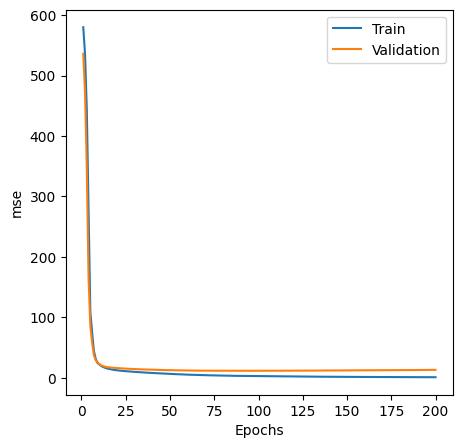

In [11]:
import matplotlib.pyplot as plt
def plot_loss_curve(total_epoch=10, start=1):
    plt.figure(figsize=(5, 5))
    plt.plot(range(start, total_epoch + 1),
             history.history['loss'][start-1:total_epoch],
             label='Train')
    plt.plot(range(start, total_epoch + 1),
             history.history['val_loss'][start-1:total_epoch],
             label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()

plot_loss_curve(total_epoch=200, start=1)

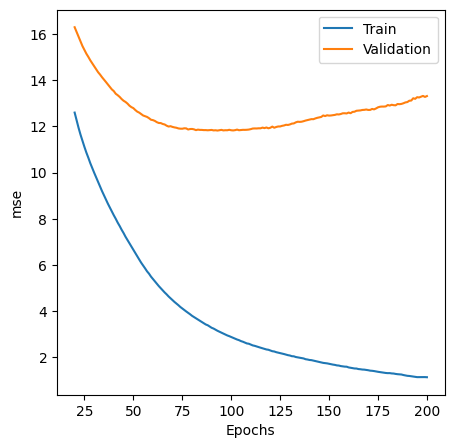

In [12]:
plot_loss_curve(total_epoch=200, start=20)